In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas.plotting as pdplt
from mpl_toolkits.mplot3d import Axes3D

import sklearn.model_selection
from sklearn.neighbors import KNeighborsClassifier

%matplotlib notebook

In [24]:
fruits = pd.read_table('fruit_data_with_colors.txt')

In [25]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [26]:
fruits.color_score.describe()

count    59.000000
mean      0.762881
std       0.076857
min       0.550000
25%       0.720000
50%       0.750000
75%       0.810000
max       0.930000
Name: color_score, dtype: float64

<IPython.core.display.Javascript object>


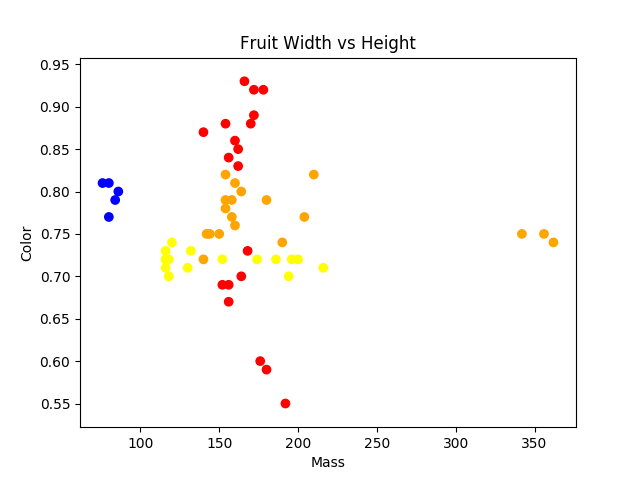

In [28]:
color_map = {1: 'red', 2: 'blue', 3: 'orange', 4: 'yellow'}

plt.figure()
plt.scatter(fruits.mass, fruits.color_score, c=fruits.fruit_label.map(color_map))
plt.xlabel('Mass')
plt.ylabel('Color')
plt.title('Fruit Width vs Height')
plt.show()

In [7]:
fruits.groupby(['fruit_label', 'fruit_name']).size()

fruit_label  fruit_name
1            apple         19
2            mandarin       5
3            orange        19
4            lemon         16
dtype: int64

<IPython.core.display.Javascript object>


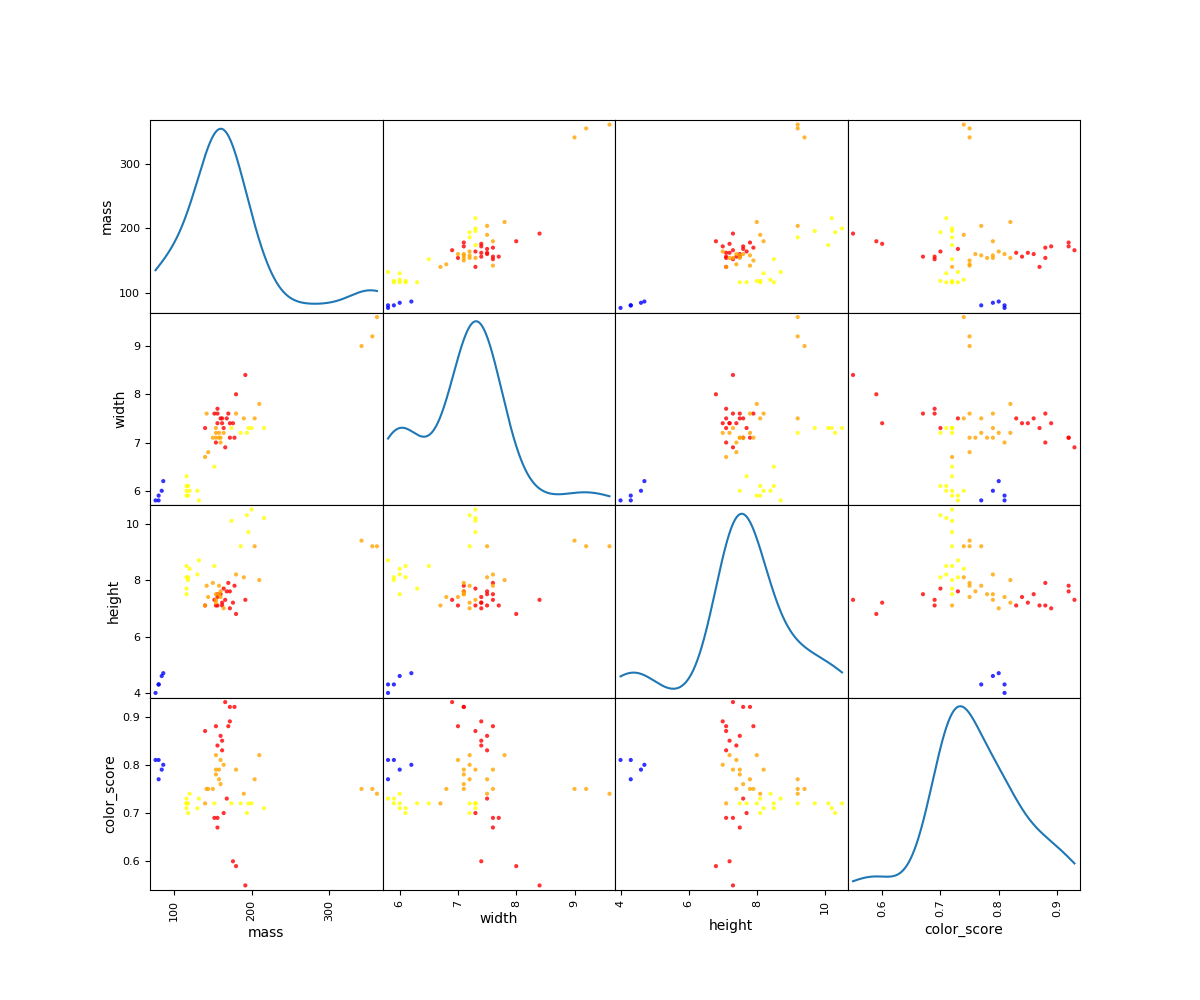

In [29]:
data = fruits[['mass', 'width', 'height', 'color_score']]
color_map = {1: 'red', 2: 'blue', 3: 'orange', 4: 'yellow'}

pdplt.scatter_matrix(data, diagonal='kde', c=fruits.fruit_label.map(color_map), alpha=.8, figsize=(12,10));

<IPython.core.display.Javascript object>


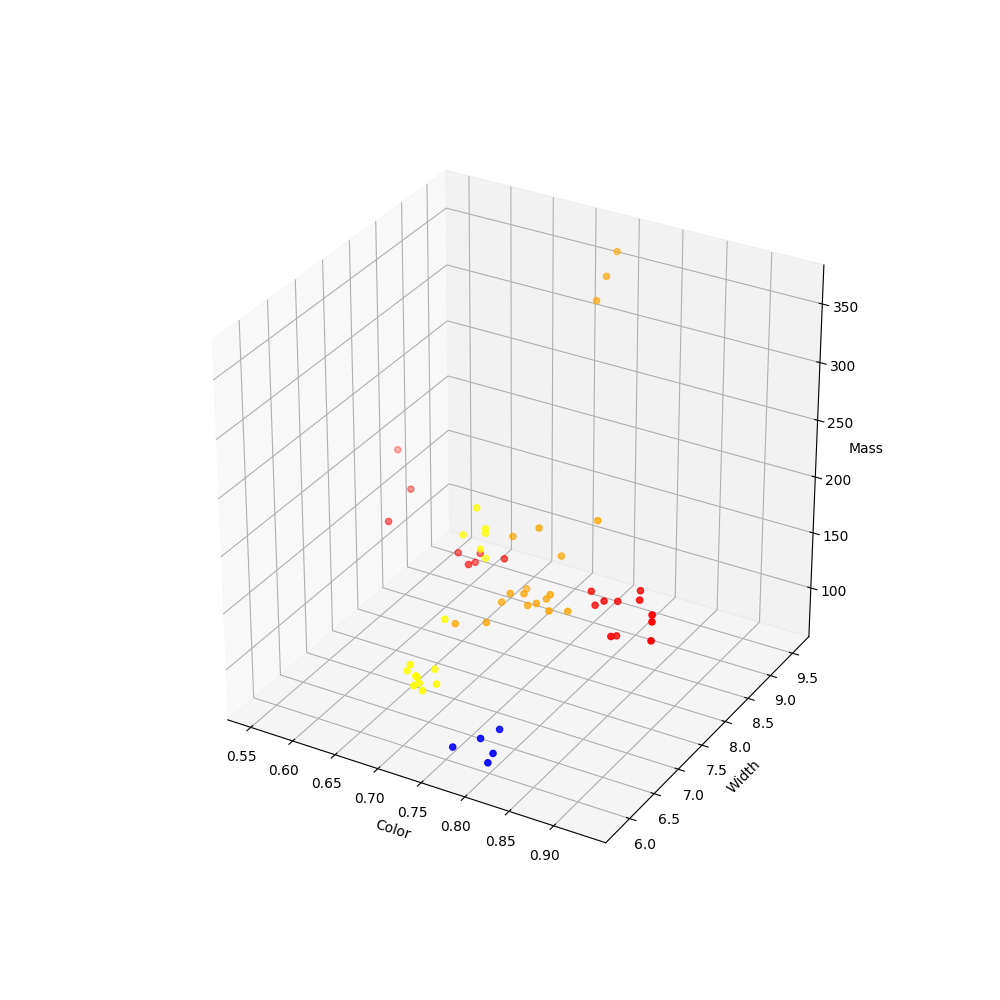

In [30]:
fig = plt.figure(figsize=(10,10))
color_map = {1: 'red', 2: 'blue', 3: 'orange', 4: 'yellow'}

ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(fruits.color_score, fruits.width, fruits.mass, c=fruits.fruit_label.map(color_map))
ax.set_xlabel('Color')
ax.set_ylabel('Width')
ax.set_zlabel('Mass')

In [31]:
X = fruits[['mass', 'color_score', 'width', 'height']]
y = fruits.fruit_label

In [32]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)

In [33]:
len(X), len(X_train), len(X_test)
len(y), len(y_train), len(y_test)

(59, 44, 15)

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

<IPython.core.display.Javascript object>


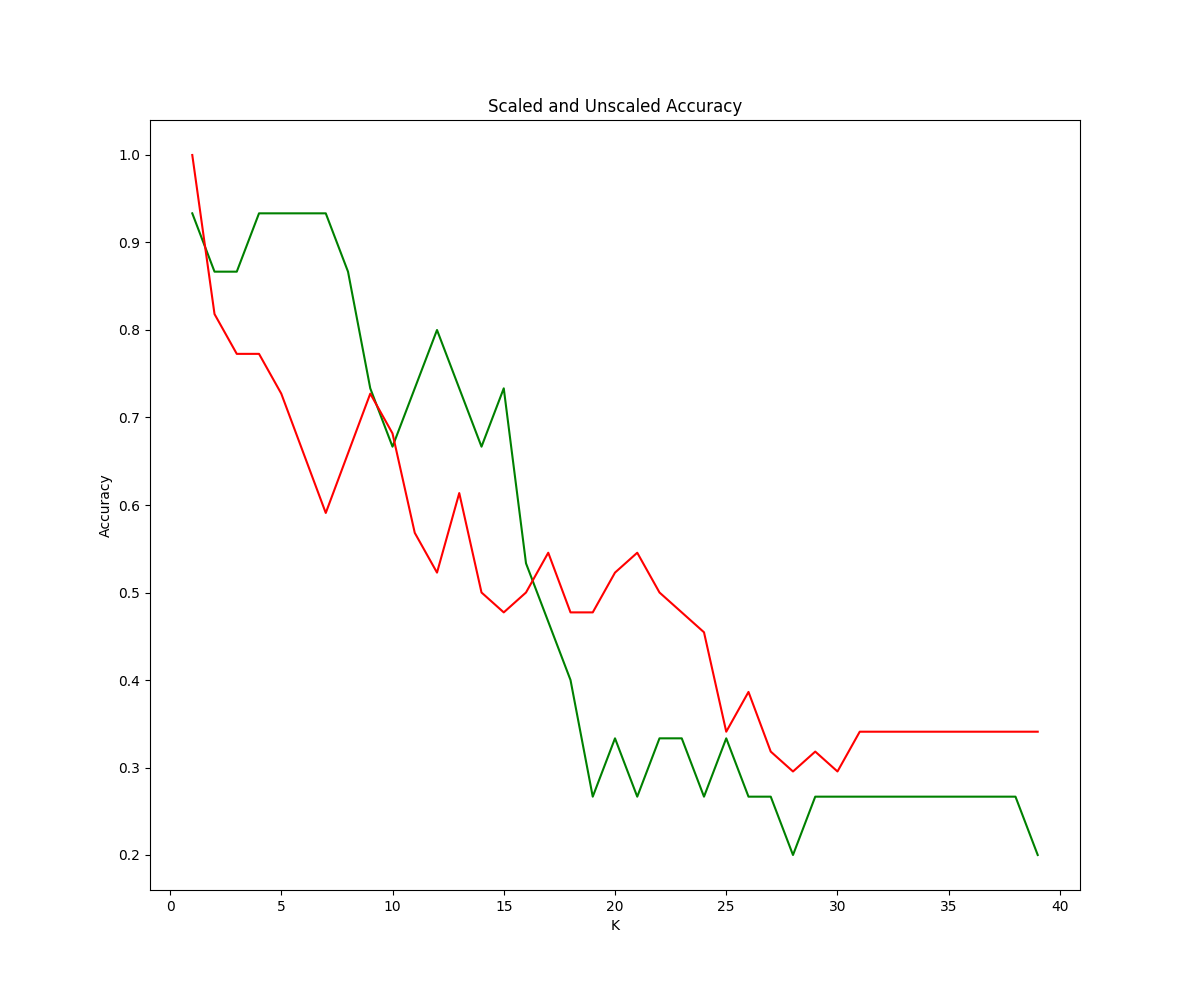

In [47]:
unscaled_scores = []
scaled_scores = []
for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    unscaled_scores.append(knn.score(X_train, y_train))

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    scaled_scores.append(knn.score(X_test_scaled, y_test))
    
fig, ax = plt.subplots(figsize=(12,10))
ax.plot(range(1, len(scaled_scores)+1), scaled_scores, c='g')
ax.plot(range(1, len(scaled_scores)+1), unscaled_scores, c='r')
ax.set_title('Scaled and Unscaled Accuracy')
ax.set_xlabel('K')
ax.set_ylabel('Accuracy')

In [42]:
len(scaled_scores)

15

In [61]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

y_predicted = knn.predict(X_test_scaled)
d = fruits.groupby('fruit_label').fruit_name.first().to_dict()

df = pd.DataFrame({'predicted': y_predicted, 'actual': y_test})
df['actual_name'] = df.actual.map(d)
df['predicted_name'] = df.predicted.map(d)
failed = df[df.predicted != df.actual]

failed.join(fruits)

,actual,predicted,actual_name,predicted_name,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
27,3,4,orange,lemon,3,orange,selected_seconds,204,7.5,9.2,0.77
31,3,1,orange,apple,3,orange,selected_seconds,210,7.8,8.0,0.82


<IPython.core.display.Javascript object>


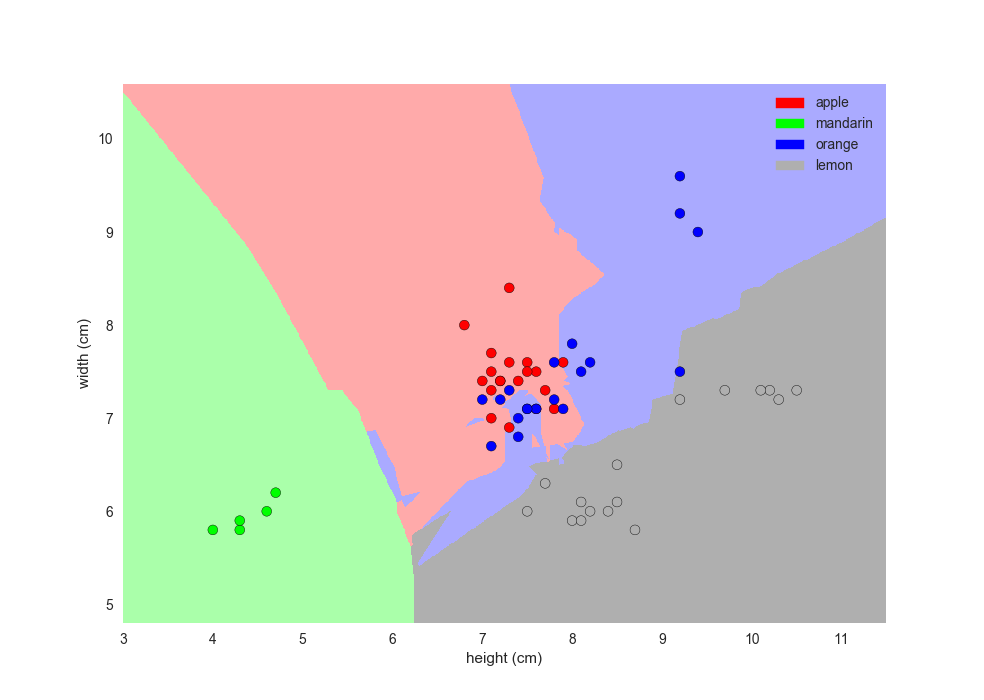

In [120]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X, y, 4, 'uniform')

0.59999999999999998